## Boosted Regression Trees

In [28]:
import sklearn
import numpy as np
import pandas as pd
import pystac
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix

ModuleNotFoundError: No module named 'pystac'

In [17]:
# read in training data (8 years)
data = pd.read_csv('climate_frog1220.csv')
data

,Unnamed: 0,gbifID,eventDate,stateProvince,decimalLatitude,decimalLongitude,species,coordinateUncertaintyInMeters,occurrenceStatus,aet_mean,...,q_mean,srad_mean,tmax_mean,tmin_mean,vap_mean,vpd_mean,ws_mean,year,month,key
0,0,3108924679,2019-05-21 00:00:00,New South Wales,-30.327163,150.335514,Crinia Signifera,5.00,0,21.166667,...,1.083333,226.416667,22.666668,8.283334,0.850000,1.210833,3.416667,2019,5,0
1,1,3463498146,2020-11-06 00:00:00,Tasmania,-41.675200,146.910000,Crinia Signifera,4.01,0,42.750000,...,8.583333,182.333333,17.258336,6.291668,0.936667,0.588333,4.975000,2020,11,1
2,2,3463520517,2020-07-02 00:00:00,Australian Capital Territory,-35.192800,149.110000,Crinia Signifera,42.18,0,31.666667,...,1.583333,214.083333,20.016667,6.916668,1.026667,0.776667,3.266667,2020,7,2
3,3,3463505912,2020-07-07 00:00:00,New South Wales,-33.755164,150.615759,Crinia Signifera,5.00,0,43.583333,...,2.500000,213.416667,24.075002,11.325001,1.288333,0.977500,2.558333,2020,7,3
4,4,3463684781,2020-11-03 00:00:00,Australian Capital Territory,-35.508773,148.929449,Crinia Signifera,6.00,0,40.083333,...,7.083333,207.250000,14.725001,3.091667,0.836667,0.482500,4.066667,2020,11,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49817,49817,3013976233,2020-12-27 19:45:00,New South Wales,-33.764413,151.146500,Litoria Fallax,2.00,1,66.666667,...,3.750000,208.416667,22.716668,12.508334,1.405000,0.772500,3.375000,2020,12,49817
49818,49818,3014012233,2020-12-27 19:49:00,New South Wales,-33.764314,151.146919,Litoria Fallax,5.00,1,66.666667,...,3.750000,208.416667,22.716668,12.508334,1.405000,0.772500,3.375000,2020,12,49818
49819,49819,3013893209,2020-12-30 20:39:00,New South Wales,-32.520437,152.322849,Litoria Fallax,61.00,1,56.500000,...,3.000000,214.083333,23.475002,13.783335,1.597500,0.702500,4.116667,2020,12,49819
49820,49820,3018139068,2020-12-30 21:44:26,Victoria,-37.743051,145.308276,Litoria Fallax,44.00,1,55.833333,...,11.083333,184.666667,19.975002,9.650002,1.105833,0.731667,4.733333,2020,12,49820


In [18]:
# preparing data for training
X = data.drop(columns=['eventDate', 'stateProvince', 'species', 'occurrenceStatus', 'Unnamed: 0', 'gbifID', 'coordinateUncertaintyInMeters', 'year', 'month', 'key'])
X

,decimalLatitude,decimalLongitude,aet_mean,def_mean,pet_mean,ppt_mean,q_mean,srad_mean,tmax_mean,tmin_mean,vap_mean,vpd_mean,ws_mean
0,-30.327163,150.335514,21.166667,116.500000,137.500000,22.000000,1.083333,226.416667,22.666668,8.283334,0.850000,1.210833,3.416667
1,-41.675200,146.910000,42.750000,52.750000,95.333333,51.750000,8.583333,182.333333,17.258336,6.291668,0.936667,0.588333,4.975000
2,-35.192800,149.110000,31.666667,76.333333,107.750000,33.000000,1.583333,214.083333,20.016667,6.916668,1.026667,0.776667,3.266667
3,-33.755164,150.615759,43.583333,71.750000,115.333333,46.000000,2.500000,213.416667,24.075002,11.325001,1.288333,0.977500,2.558333
4,-35.508773,148.929449,40.083333,47.000000,86.916667,46.750000,7.083333,207.250000,14.725001,3.091667,0.836667,0.482500,4.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49817,-33.764413,151.146500,66.666667,44.833333,111.333333,70.833333,3.750000,208.416667,22.716668,12.508334,1.405000,0.772500,3.375000
49818,-33.764314,151.146919,66.666667,44.833333,111.333333,70.833333,3.750000,208.416667,22.716668,12.508334,1.405000,0.772500,3.375000
49819,-32.520437,152.322849,56.500000,56.750000,113.583333,59.166667,3.000000,214.083333,23.475002,13.783335,1.597500,0.702500,4.116667
49820,-37.743051,145.308276,55.833333,50.750000,106.583333,69.000000,11.083333,184.666667,19.975002,9.650002,1.105833,0.731667,4.733333


In [19]:
y = data.occurrenceStatus.astype(int)
y

0        0
1        0
2        0
3        0
4        0
        ..
49817    1
49818    1
49819    1
49820    1
49821    1
Name: occurrenceStatus, Length: 49822, dtype: int64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True,
                                   test_size=0.10, random_state=0)
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.75
}

reg = GradientBoostingClassifier(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

KeyboardInterrupt: 

### Plot training deviance

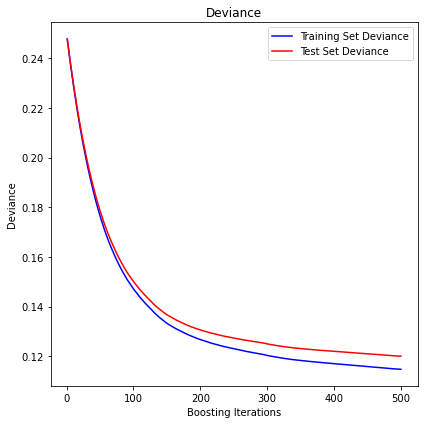

In [13]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

In [21]:
features = X.drop(columns=['decimalLatitude', 'decimalLongitude'])
features.columns

Index(['aet_mean', 'def_mean', 'pet_mean', 'ppt_mean', 'q_mean', 'srad_mean',
       'tmax_mean', 'tmin_mean', 'vap_mean', 'vpd_mean', 'ws_mean'],
      dtype='object')

### Plot feature importance

ValueError: The number of FixedLocator locations (13), usually from a call to set_ticks, does not match the number of ticklabels (11).

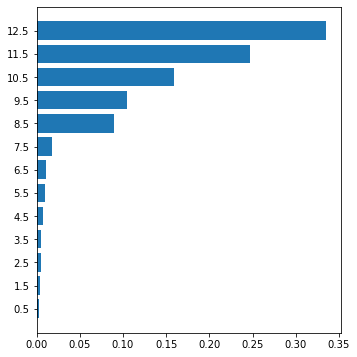

In [22]:
features = X.drop(columns=['decimalLatitude', 'decimalLongitude'])

feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(features.columns))
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(features.columns)
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

0.5199570723353459

In [27]:
# trying out different values for the learning rate
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.772
Accuracy score (validation): 0.766
Learning rate:  0.075
Accuracy score (training): 0.785
Accuracy score (validation): 0.776
Learning rate:  0.1
Accuracy score (training): 0.786
Accuracy score (validation): 0.774
Learning rate:  0.25
Accuracy score (training): 0.792
Accuracy score (validation): 0.783
Learning rate:  0.5
Accuracy score (training): 0.801
Accuracy score (validation): 0.797
Learning rate:  0.75
Accuracy score (training): 0.817
Accuracy score (validation): 0.808
Learning rate:  1
Accuracy score (training): 0.807
Accuracy score (validation): 0.795


In [21]:
# USE THIS
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[1819  646]
 [ 368 2150]]
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.74      0.78      2465
           1       0.77      0.85      0.81      2518

    accuracy                           0.80      4983
   macro avg       0.80      0.80      0.80      4983
weighted avg       0.80      0.80      0.80      4983



## Grid Search

#### Find best values for GradientBoostingClassifier parameters

In [22]:
from sklearn.model_selection import cross_val_score, RepeatedKFold, GridSearchCV

gridsearch1 = GridSearchCV(GradientBoostingClassifier(), param_grid = {'max_depth': [2, 3, 4, 5],
                                                                       'learning_rate': [0.01,0.05,0.1,0.75,0.5],
                                                                       'min_samples_leaf': [4,5,6],
                                                                       'n_estimators': [10,15,20],
                                                                       'max_features':['log2','sqrt', 2]}, scoring = 'f1', verbose = 0)


In [14]:
gridsearch1.fit(X, y)
print("\n The best estimator across ALL searched params:\n",gridsearch1.best_estimator_)
print("\n The best score across ALL searched params:\n",gridsearch1.best_score_)
print("\n The best parameters across ALL searched params:\n",gridsearch1.best_params_)


 The best estimator across ALL searched params:
 GradientBoostingClassifier(learning_rate=0.01, max_depth=2, max_features=2,
                           min_samples_leaf=5, n_estimators=10)

 The best score across ALL searched params:
 0.7916664610554822

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 2, 'max_features': 2, 'min_samples_leaf': 5, 'n_estimators': 10}


In [ ]:
# regression classifier 卡在了submission test的最后一步。现在在做gridsearch，有点长， 下次不print全部，直接找max score的combo

### Try best model!

In [23]:
gb_clf1 = GradientBoostingClassifier(n_estimators=10, learning_rate=0.01, max_features=2, min_samples_leaf=5, max_depth=2, random_state=0)
gb_clf1.fit(X_train, y_train)
predictions = gb_clf1.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[1491  974]
 [ 189 2329]]
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.60      0.72      2465
           1       0.71      0.92      0.80      2518

    accuracy                           0.77      4983
   macro avg       0.80      0.76      0.76      4983
weighted avg       0.80      0.77      0.76      4983



### Test on the submission testing set

In [29]:
# Load in test coordinates
test_file = pd.read_csv('challenge_1_submission_template.csv')

# Read in test regions
test_1_regions = []
with open('challenge_1_test_regions.csv', 'r') as file: 
    for i, line in enumerate(file):
        if i > 0:
            test_1_regions.append(eval("("+line+")"))
            
# Load in regions and save as list of dictionaries.
test_regions = [{'title':i, 'bbox':bbox} for i, bbox in enumerate(test_1_regions)]

In [30]:
def get_terraclimate(bbox, metrics, time_slice=None, assets=None, features=None, interp_dims=None, verbose=True):
    """Returns terraclimate metrics for a given area, allowing results to be interpolated onto a larger image.
    
    Attributes:
    bbox -- Tuple of (min_lon, min_lat, max_lon, max_lat) to define area
    metrics -- Nested dictionary in the form {<metric_name>:{'fn':<metric_function>,'params':<metric_kwargs_dict>}, ... }
    time_slice -- Tuple of datetime strings to select data between, e.g. ('2015-01-01','2019-12-31')
    assets -- list of terraclimate assets to take
    features -- list of asset metrics to take, specified by strings in the form '<asset_name>_<metric_name>'
    interp_dims -- Tuple of dimensions (n, m) to interpolate results to
    """
    min_lon, min_lat, max_lon, max_lat = bbox
    
    collection = pystac.read_file("https://planetarycomputer.microsoft.com/api/stac/v1/collections/terraclimate")
    asset = collection.assets["zarr-https"]
    store = fsspec.get_mapper(asset.href)
    data = xr.open_zarr(store, **asset.extra_fields["xarray:open_kwargs"])
    
    # Select datapoints that overlap region
    if time_slice is not None:
        data = data.sel(lon=slice(min_lon,max_lon),lat=slice(max_lat,min_lat),time=slice(time_slice[0],time_slice[1]))
    else:
        data = data.sel(lon=slice(min_lon,max_lon),lat=slice(max_lat,min_lat))
    if assets is not None:
        data = data[assets]
    print('Loading data') if verbose else None
    data = data.rename(lat='y', lon='x').to_array().compute()
        
    # Calculate metrics
    combined_values = []
    combined_bands = []
    for name, metric in metrics.items():
        print(f'Calculating {name}') if verbose else None
        sum_data = xr.apply_ufunc(
            metric['fn'], data, input_core_dims=[["time"]], kwargs=metric['params'], dask = 'allowed', vectorize = True
        ).rename(variable='band')
        xcoords = sum_data.x
        ycoords = sum_data.y
        dims = sum_data.dims
        combined_values.append(sum_data.values)
        for band in sum_data.band.values:
            combined_bands.append(band+'_'+name)
        
    # Combine metrics
    combined_values = np.concatenate(
        combined_values,
        axis=0
    )
    combined_data = xr.DataArray(
        data=combined_values,
        dims=dims,
        coords=dict(
            band=combined_bands,
            y=ycoords,
            x=xcoords
        )
    )    

    # Take relevant bands:
    combined_data = combined_data.sel(band=features)
    
    if interp_dims is not None:
        print(f'Interpolating image') if verbose else None
        interp_coords = (np.linspace(bbox[0], bbox[2], interp_dims[0]), np.linspace(bbox[1], bbox[3], interp_dims[1]))
        combined_data = combined_data.interp(x=interp_coords[0], y=interp_coords[1], method='nearest', kwargs={"fill_value": "extrapolate"})
    
    return combined_data

In [31]:
tc_metrics = {
    'mean':{
        'fn':np.nanmean,
        'params':{}
    },
    'min':{
        'fn':np.nanmin,
        'params':{}
    },
    'max':{
        'fn':np.nanmax,
        'params':{}
    }
}

time_slice = ('2012-01-01','2020-12-31')
assets=['tmax', 'tmin', 'ppt', 'srad','vap','ws','aet','def','pet','q','vpd']
features=['tmax_mean', 'tmin_mean', 'ppt_mean','srad_mean','vap_mean','ws_mean',
      	'Aet_mean','def_mean','pet_mean','q_mean','vpd_mean']

In [33]:
def filter_bbox(frogs, bbox):
    frogs = frogs[lambda x: 
        (x.decimalLongitude >= bbox[0]) &
        (x.decimalLatitude >= bbox[1]) &
        (x.decimalLongitude <= bbox[2]) &
        (x.decimalLatitude <= bbox[3])
    ]
    return frogs

# Obtain predictor data for each region and get predictor image
for region in test_regions:
    region['coords'] = filter_bbox(test_file[['id', 'decimalLongitude', 'decimalLatitude']], region['bbox'])
    region['predictors'] = get_terraclimate(region['bbox'], tc_metrics, time_slice=time_slice, assets=assets, features=features)
    region['result'] = predict_frogs(region['predictors'], full_model) > 0.5
    
    region['result'].plot.imshow(x='x', y='y', vmin=0, vmax=1)
    plt.show()
    

NameError: name 'pystac' is not defined